In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [5]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [7]:
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [8]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [9]:
X.values[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]], dtype=int64)

In [10]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900], dtype=int64)

In [11]:
model=DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [12]:
predict_data=np.array([[3200,3],[3720,2]])
predict_data

array([[3200,    3],
       [3720,    2]])

In [13]:
model.predict(predict_data)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([579900., 573900.])

In [14]:
model=DecisionTreeRegressor(max_depth=3,min_samples_leaf=3) 
# max_depth = ile moze miec poziomow
# min_samples_leaf = minimalna liczba obserwacji w liściu
model.fit(X,y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=3)

In [15]:
model.predict(predict_data)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([572933.33333333, 607600.        ])

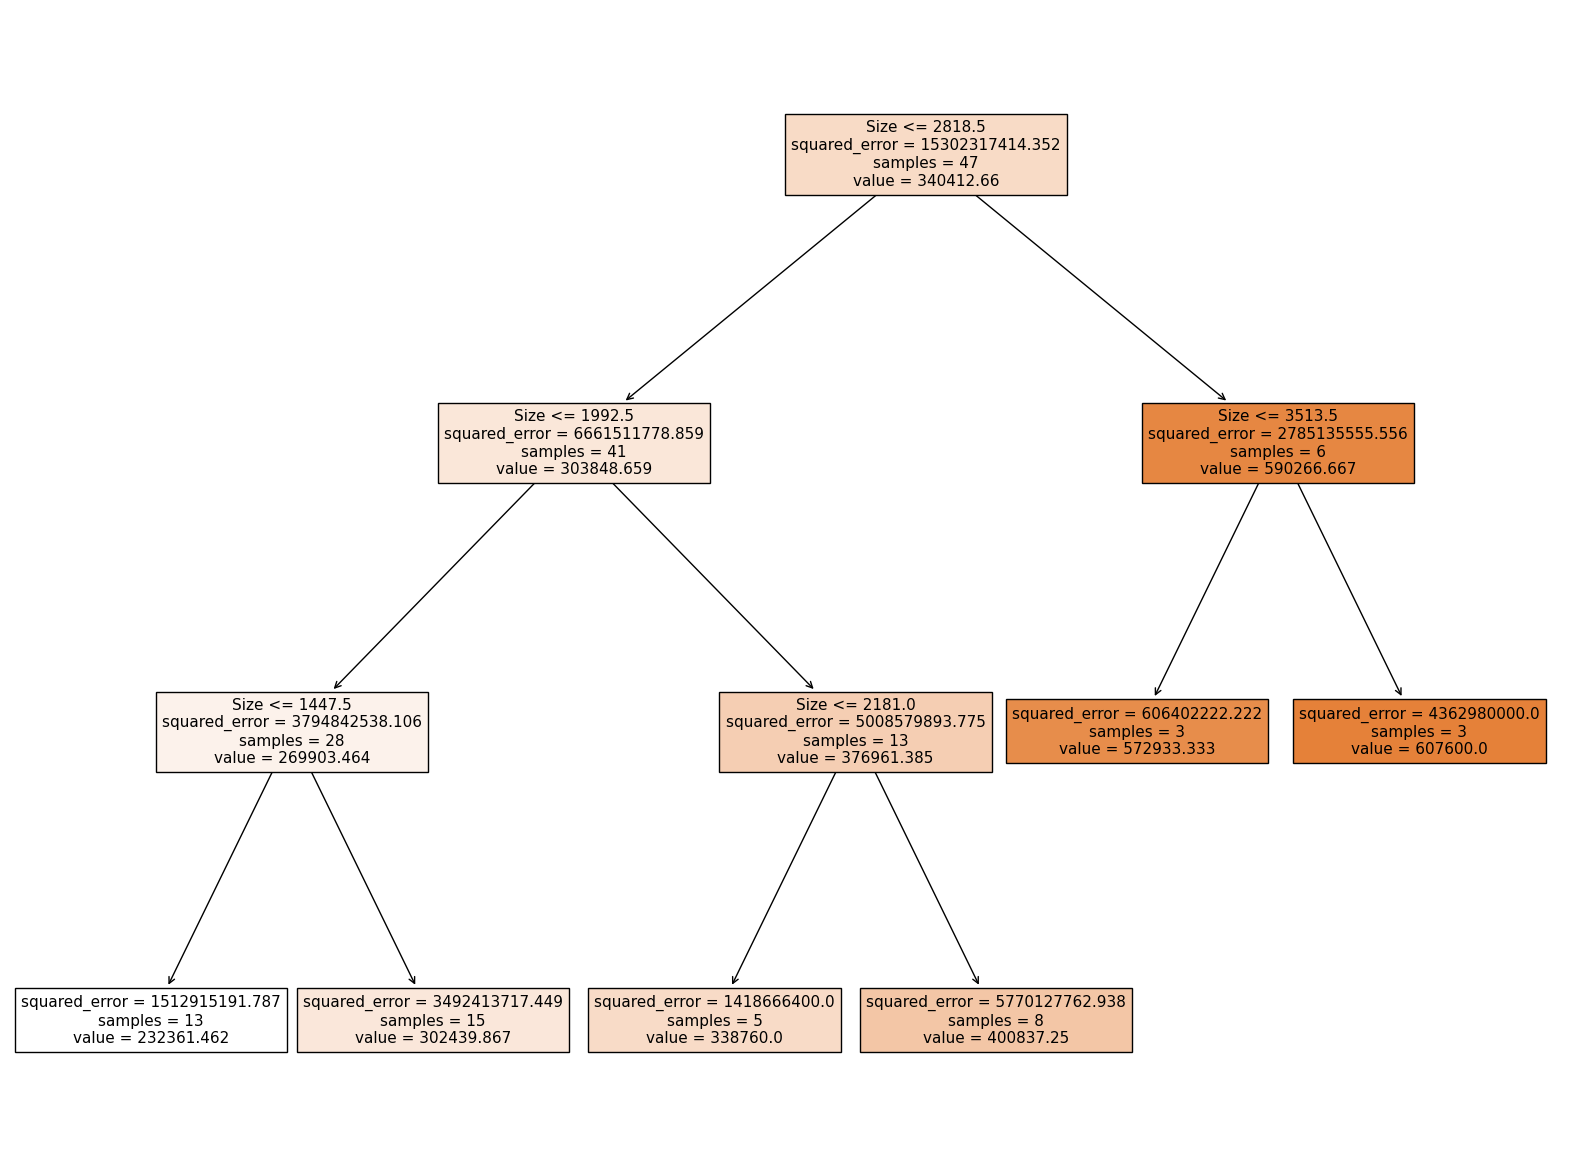

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [19]:
#value = 232361 - Size<=1447.5
#value = 338760 - 1992.5 <=Size <= 2181
#value = 400837 - 2181 <=Size <= 2818.5
#value = 572933 - 2818.5 <=Size <= 3513.5
#value = 607600 - Size>= 3513.5

#### Które cechy były ważne w tworzeniu drzewa

In [20]:
feat_importance=model.tree_.compute_feature_importances(normalize=False)
feat_importance=pd.concat([X.columns.to_series().reset_index(drop=True),pd.Series(feat_importance)],axis=1)
feat_importance=feat_importance.sort_values(feat_importance.columns[1],ascending=False)
feat_importance.columns = ['Feature', 'Importance']
feat_importance

,Feature,Importance
0,Size,1.231899e+10
1,Bedrooms,0.000000e+00


## zad1

In [21]:
#wracamy do zbioru danych o wypożyczeniach rowerów
url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df=pd.read_csv(url)
df.head()
#zmienne niezależne - atemp, hum, windspeed
#zmienna zależna - cnt
X = df[["atemp", "hum", "windspeed"]]
y = df["cnt"]

In [47]:
#wytrenowanie modelu
#model ma przewidywać liczbę wypożyczonych rowerów
#dodaj warunek, gdzie min_samples_split - 10% wielkości orygnialnego datasetu
#dodatkowo ogranicz głębokość drzewa max do 5 poziomów
min_num=int(0.1*df.shape[0])
model = DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=min_num
        )
model.fit(X,y)

DecisionTreeRegressor(max_depth=5, min_samples_split=73)

In [48]:
min_samples_split =0.1 *df.shape[0]
min_samples_split

73.10000000000001

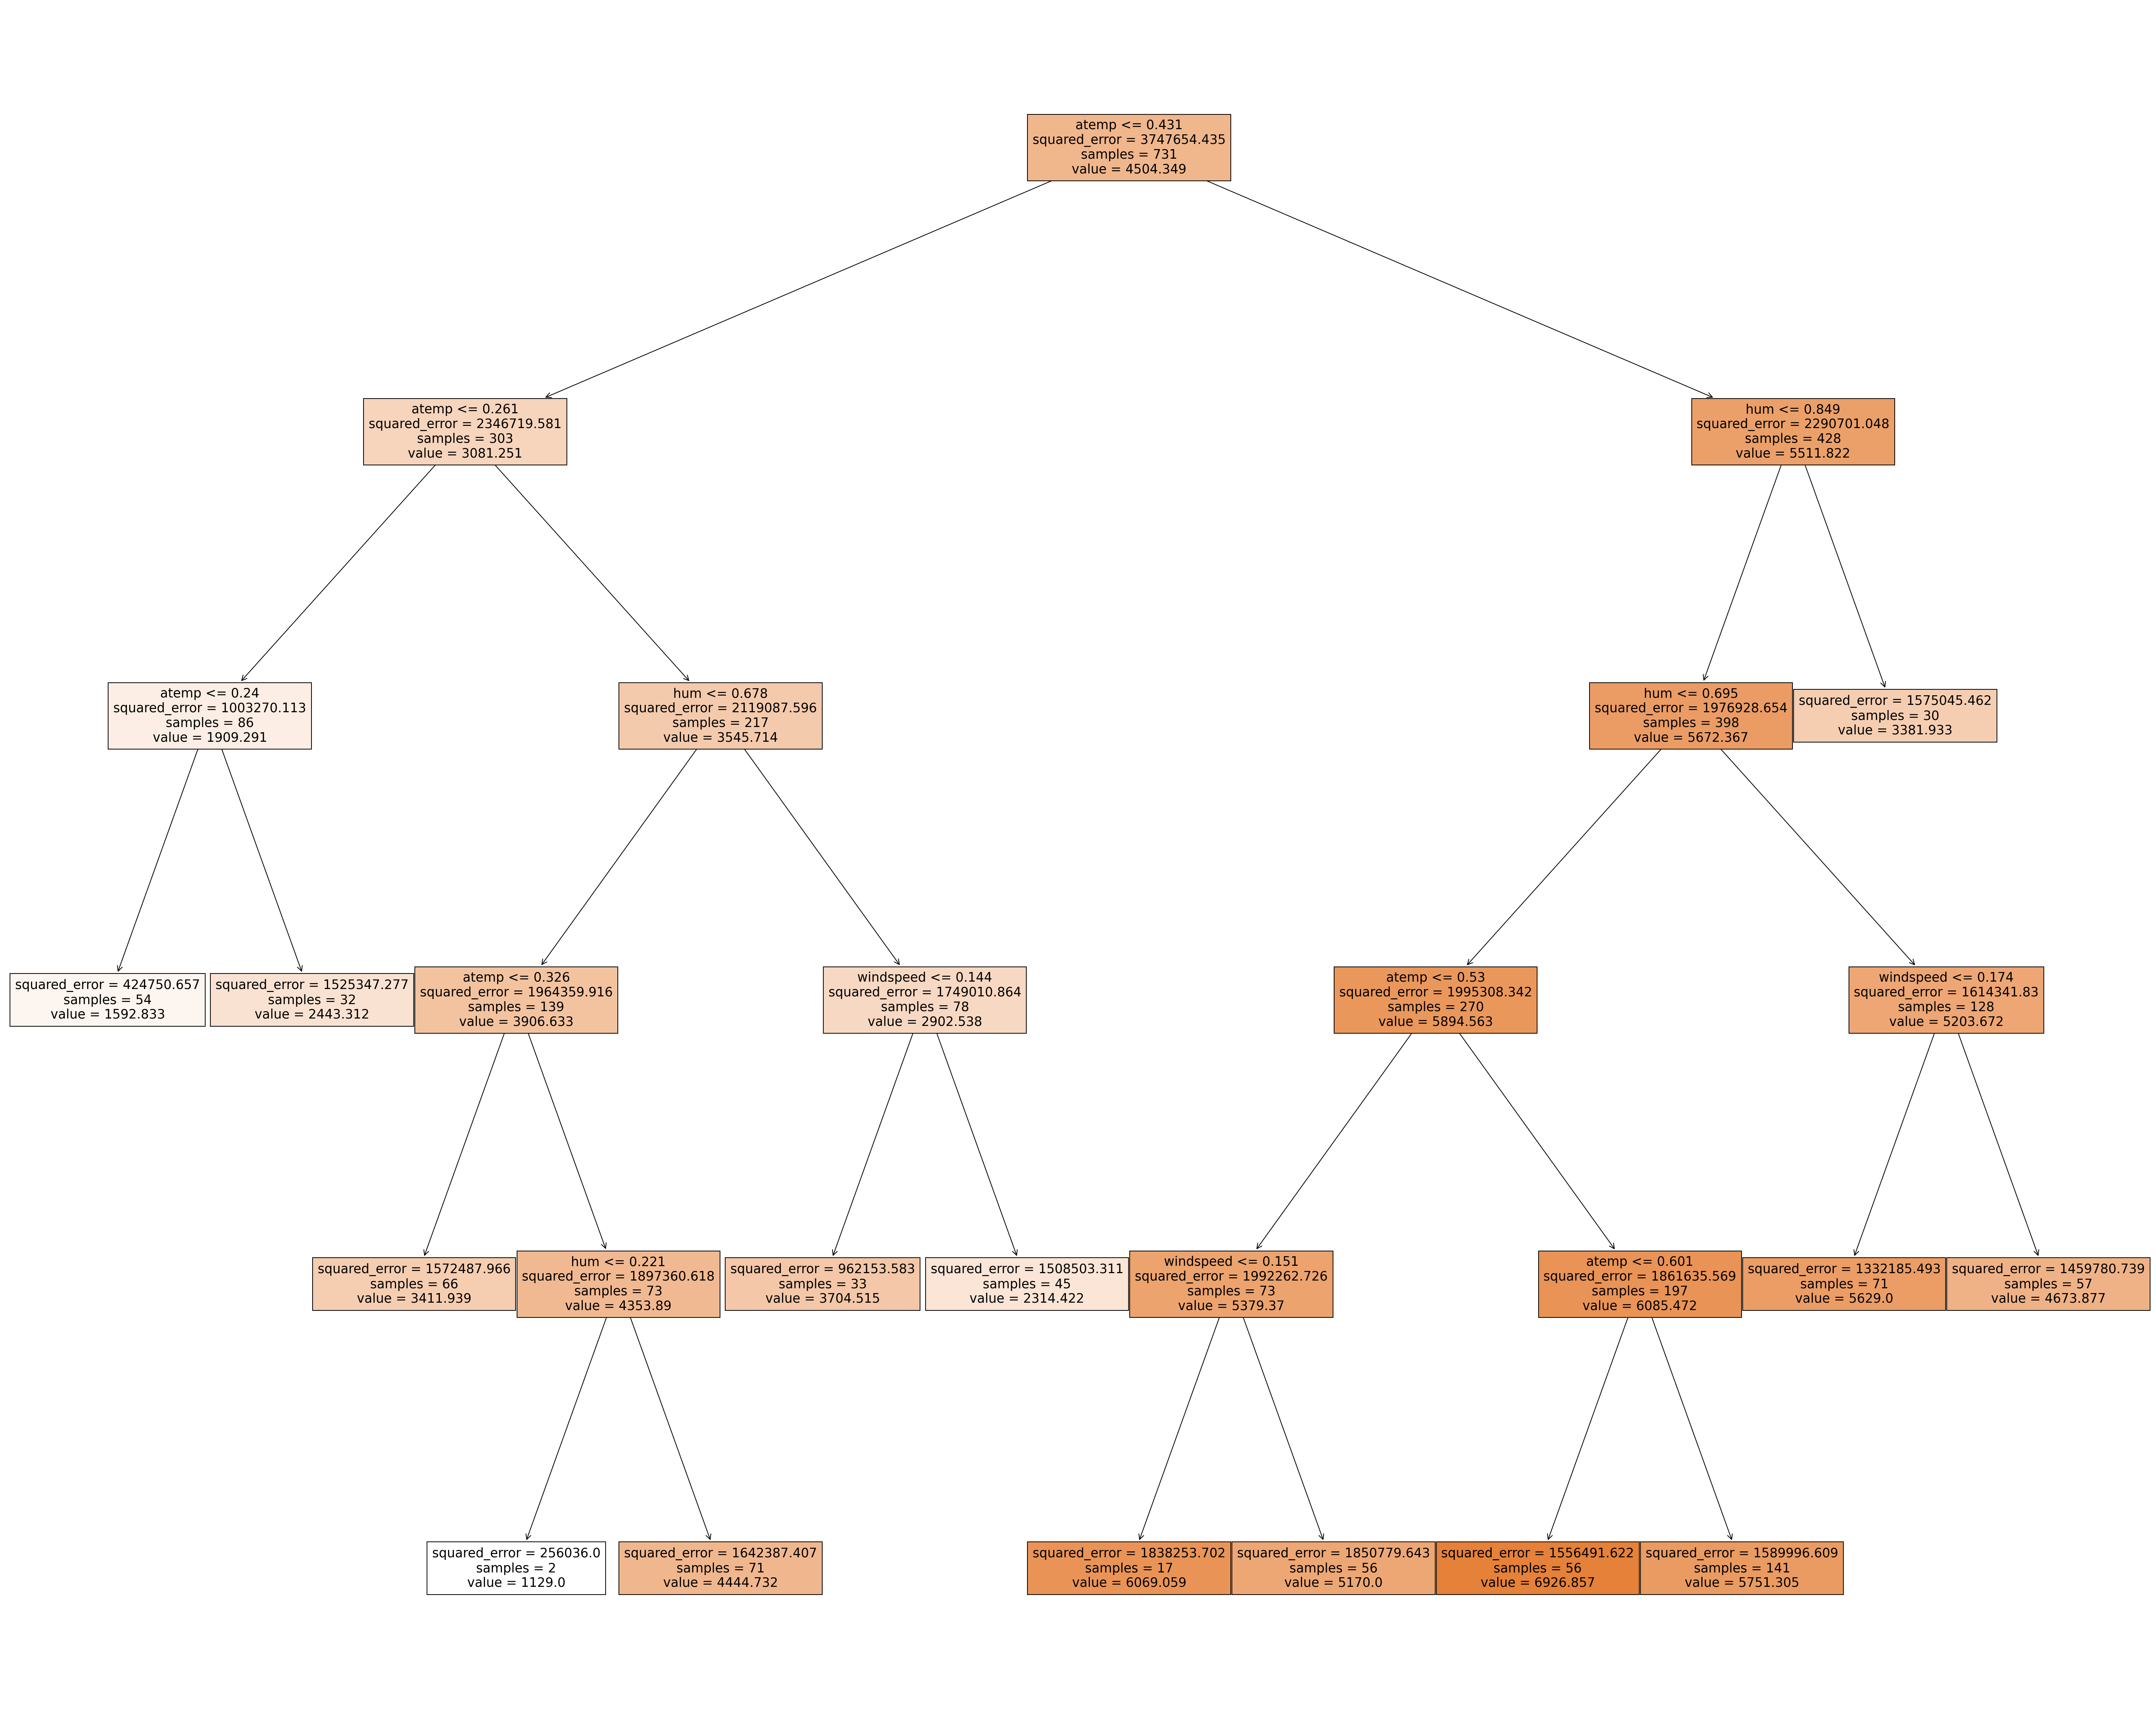

In [53]:
#zwizualizuj drzewo
fig=plt.figure(figsize=(50,40),dpi=150)
tree_plot=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [50]:
#odczytaj predykcję dla wartości atemp=0.3, hum=0.3, windspeed=0.3

In [51]:
#dokonaj predykcji dla tych wartości
predict_data=np.array([[0.3, 0.3,0.3]])
predict_data
model.predict(predict_data)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3411.93939394])

In [52]:
#sprawdź które cechy są najważniejsze w predykcji (feature importance)
feat_importance=model.tree_.compute_feature_importances(normalize=False)
feat_importance=pd.concat([X.columns.to_series().reset_index(drop=True),pd.Series(feat_importance)],axis=1)
feat_importance=feat_importance.sort_values(feat_importance.columns[1],ascending=False)
feat_importance.columns = ['Feature', 'Importance']
feat_importance

,Feature,Importance
0,atemp,1.833413e+06
1,hum,3.550733e+05
2,windspeed,1.042044e+05
